In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import palettable.colorbrewer.sequential as pal
from tqdm import tqdm
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

rc('text', usetex=False)



In [2]:
def dx_norm(theta,phi,alpha, Jx):
    dF = np.array([np.cos(alpha),np.sin(alpha)])
    g = np.array([np.cos(phi),np.sin(phi)])
    s = np.array([np.cos(theta),np.sin(theta)])
    return np.linalg.norm(np.matmul(np.linalg.inv(Jx - np.outer(g, s)), dF))

In [3]:
def avg_dx_norm(theta,phi,Jx,sigma,alphas):
    return np.mean([dx_norm(theta,phi,alpha, Jx) for alpha in alphas])

In [9]:
mode_gaps = np.logspace(-2,0,100)
sigmas = np.array([0.1, .25,.75,1])
sdots_sigma = []
sdots_sigma_alpha = []
gdots_sigma = []
gdots_sigma_alpha = []
alpha_0 = np.pi/4
for i in sigmas:
    alphas = sp.stats.truncnorm.rvs(-np.pi/i,np.pi/i,loc=0, scale=i, size=1000 ) + alpha_0 
    thetas = []
    phis = []
    sdots = []
    gdots = []
    sdots_alpha = []
    gdots_alpha = []
    for j in tqdm(mode_gaps):
        Jx = np.array([[-5*j,0],[0,-5]])
        x = lambda vars : avg_dx_norm(vars[0],vars[1], Jx,i ,alphas)
        results = sp.optimize.minimize(x,np.array([.1,.1]),bounds = [(0,2*np.pi),(0,2*np.pi)]).x
        thetas.append(results[0])
        phis.append(results[1])
        sdots.append(np.dot(np.array([np.cos(results[0]),np.sin(results[0])]),np.array([1,0])))
        gdots.append(np.dot(np.array([np.cos(results[1]),np.sin(results[1])]),np.array([1,0])))
        sdots_alpha.append(np.dot(np.array([np.cos(results[0]),np.sin(results[0])]),np.array([np.cos(alpha_0 ),np.sin(alpha_0 )])))
        gdots_alpha.append(np.dot(np.array([np.cos(results[1]),np.sin(results[1])]),np.array([np.cos(alpha_0 ),np.sin(alpha_0 )])))
    sdots_sigma.append(sdots)
    gdots_sigma.append(gdots)
    sdots_sigma_alpha.append(sdots_alpha)
    gdots_sigma_alpha.append(gdots_alpha)

100%|██████████████████████████████████████| 100/100 [02:05<00:00,  1.26s/it]


In [28]:
[pal.Oranges_4.mpl_colors[i] for i in range(len(sigmas))]

[(0.996078431372549, 0.9294117647058824, 0.8705882352941177),
 (0.9921568627450981, 0.7450980392156863, 0.5215686274509804),
 (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 (0.8509803921568627, 0.2784313725490196, 0.00392156862745098)]

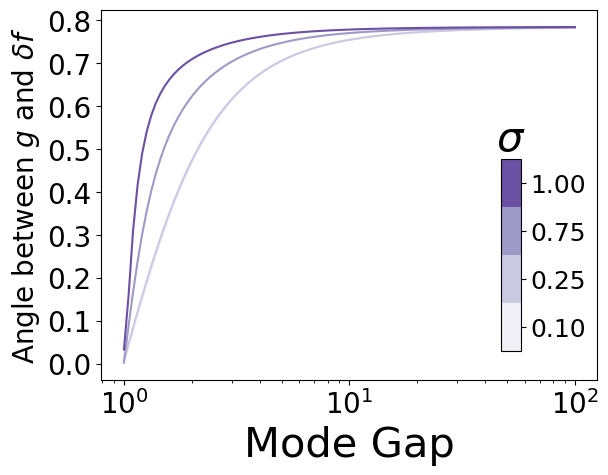

In [55]:
from matplotlib.colors import ListedColormap
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['text.usetex'] = False
colors = [pal.Purples_4.mpl_colors[i] for i in range(len(sigmas))]
cmap = ListedColormap(colors)

mode_gaps = np.logspace(-2,0,100)

for i in range(len(sigmas)):
    plt.plot(1/mode_gaps,np.arccos(np.abs(gdots_sigma_alpha[i])),color=colors[i], label = 'angle between g and v_a, perturbation std = '+ str(sigmas[i]))
plt.ylabel('Angle between $g$ and $\delta f$', fontsize=20)
plt.xlabel('Mode Gap', fontsize=30)

plt.xscale('log')
xticks = plt.gca().get_xticklabels()
yticks = plt.gca().get_yticklabels()
# Increase the tick size for both x and y axes
for tick in xticks + yticks:
    tick.set_fontsize(20)  # Adjust the font size as desired
norm = plt.Normalize(-100,100)
cbar_ax = plt.gcf().add_axes([0.75, 0.17, 0.03, 0.4])



cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap),cax=cbar_ax)
cbar.set_ticks([i*.25 + .125 for i in range(len(sigmas))])
cbar.set_ticklabels([f'{param:.2f}' for param in sigmas])
cbar.ax.set_title('$\sigma$', fontsize=30)


xticks = plt.gca().get_xticklabels()
yticks = plt.gca().get_yticklabels()

# Increase the tick size for both x and y axes
for tick in xticks + yticks:
    tick.set_fontsize(18)  # Adjust the font size as desired

plt.savefig("figga.svg")
plt.show()

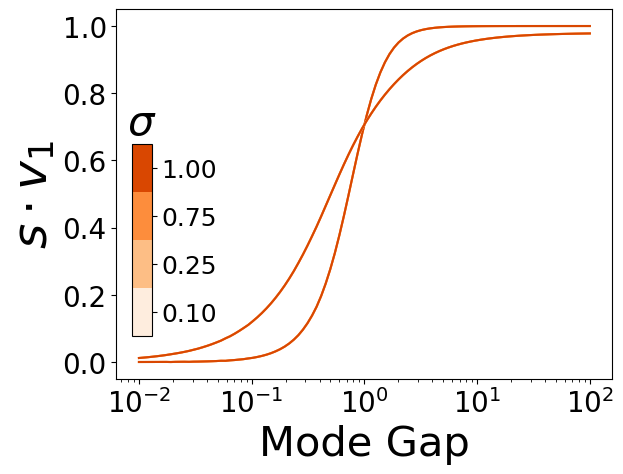

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['text.usetex'] = False
colors = [pal.Oranges_4.mpl_colors[i] for i in range(len(sigmas))]
cmap = ListedColormap(colors)

mode_gaps = np.logspace(-2,2,100)
for i in range(len(sigmas)):
    plt.plot(1/mode_gaps,np.abs(gdots_sigma[i]),color=colors[i], label = 'dot product of s and v_1, perturbation std = '+ str(sigmas[i]))
plt.ylabel('$s \cdot v_1$', fontsize=35)
plt.xlabel('Mode Gap', fontsize=30)

mode_gaps = np.logspace(-2,2,100)
for i in range(len(sigmas)):
    plt.plot(1/mode_gaps,np.abs(sdots_sigma[i]),color=colors[i], label = 'dot product of s and v_1, perturbation std = '+ str(sigmas[i]))
plt.ylabel('$s \cdot v_1$', fontsize=35)
plt.xlabel('Mode Gap', fontsize=30)

plt.xscale('log')
xticks = plt.gca().get_xticklabels()
yticks = plt.gca().get_yticklabels()
# Increase the tick size for both x and y axes
for tick in xticks + yticks:
    tick.set_fontsize(20)  # Adjust the font size as desired
norm = plt.Normalize(min(mode_gaps), max(mode_gaps))
cbar_ax = plt.gcf().add_axes([0.15, 0.2, 0.03, 0.4])



cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm),cax=cbar_ax)
cbar.set_ticks([i*25 + 12.5 for i in range(len(sigmas))])
cbar.set_ticklabels([f'{param:.2f}' for param in sigmas])
cbar.ax.set_title('$\sigma$', fontsize=30)


xticks = plt.gca().get_xticklabels()
yticks = plt.gca().get_yticklabels()

# Increase the tick size for both x and y axes
for tick in xticks + yticks:
    tick.set_fontsize(18)  # Adjust the font size as desired

plt.savefig("fig1c.svg")
plt.show()

In [ ]:
[i*.25 + 1/8 for i in range(len(sigmas))]

[0.125, 0.375, 0.625, 0.875]

In [ ]:
x(np.array([.1,.1]))

TypeError: ignored

In [56]:
sdots = []
sdot_alphas = []
mode_gaps = np.array([1,0.9, 0.75,0.5,0.1,0.02])

for j in mode_gaps:
  alpha = 0.4
  Jx = np.array([[-5*j,0],[0,-5]])
  thetas = []
  phis = []
  for alpha in tqdm(np.linspace(0,.99*np.pi/2,1000)):
    x = lambda vars : dx_norm(vars[0],vars[1],alpha, Jx)

    results = sp.optimize.minimize(x,np.array([.1,.1]),bounds = [(0,2*np.pi),(0,2*np.pi)]).x
    thetas.append(results[0])
    phis.append(results[1])
  alphas = np.linspace(0,.99*np.pi/2,1000)
  sdot = [np.dot(np.array([np.cos(phis[i]),np.sin(phis[i])]),np.array([1,0])) for i in range(len(alphas))]
  sdot_alpha = [np.dot(np.array([np.cos(phis[i]),np.sin(phis[i])]),np.array([np.cos(alphas[i]),np.sin(alphas[i])])) for i in range(len(alphas))]
  #gdot = [np.dot(np.array([np.cos(thetas[i]),np.sin(thetas[i])]),np.array([0,1])) for i in range(len(alphas))]
  sdots.append(sdot)
  sdot_alphas.append(sdot_alpha)
  #plt.plot(alphas,np.abs(sdot),label = 'mode gap = ' + str(j))
  #plt.plot(alphas,np.abs(gdot))


100%|███████████████████████████████████| 1000/1000 [00:03<00:00, 262.90it/s]


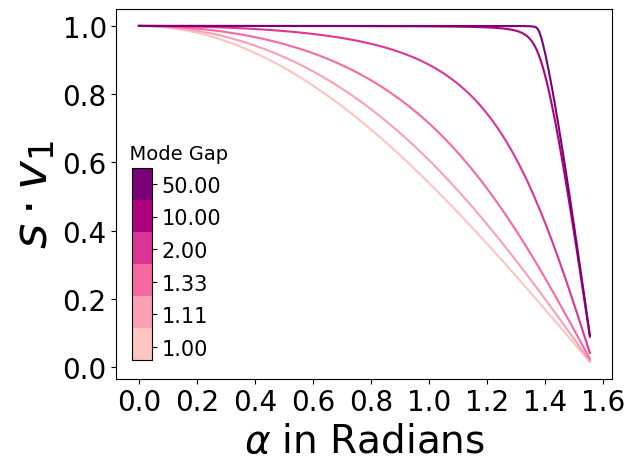

In [63]:
from matplotlib.colors import ListedColormap
mode_gaps = np.array([1,0.9, 0.75,0.5,0.1,0.02])

colors = [pal.RdPu_8.mpl_colors[i+2] for i in range(len(mode_gaps))]
cmap = ListedColormap(colors)

plt.rcParams['text.usetex'] = False
mode_gaps = np.array([1,0.9, 0.75,0.5,0.1,0.02])
for j in range(len(mode_gaps)):
      plt.plot(alphas,(np.abs(sdots[j])),color = colors[j],label = 'mode gap = ' + str(np.round(1/mode_gaps[j],2) ) )
plt.xlabel(r'$\alpha$ in Radians', fontsize=28)
plt.ylabel('$s \cdot v_1$', fontsize=35)
xticks = plt.gca().get_xticklabels()
yticks = plt.gca().get_yticklabels()

# Increase the tick size for both x and y axes
for tick in xticks + yticks:
    tick.set_fontsize(20)  # Adjust the font size as desired
norm = plt.Normalize(min(mode_gaps), max(mode_gaps))
cbar_ax = plt.gcf().add_axes([0.15, 0.15, 0.03, 0.4])



cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm),cax=cbar_ax)
cbar.set_ticks([1/6*(i) + 1/12 for i in range(len(mode_gaps))])
cbar.set_ticklabels([f'{param:.2f}' for param in 1/mode_gaps])


cbar.ax.set_title('            Mode Gap', fontsize = 14)
xticks = plt.gca().get_xticklabels()
yticks = plt.gca().get_yticklabels()

# Increase the tick size for both x and y axes
for tick in xticks + yticks:
    tick.set_fontsize(15)  # Adjust the font size as desired

#plt.legend()
plt.savefig("fig1b.svg")
plt.show()

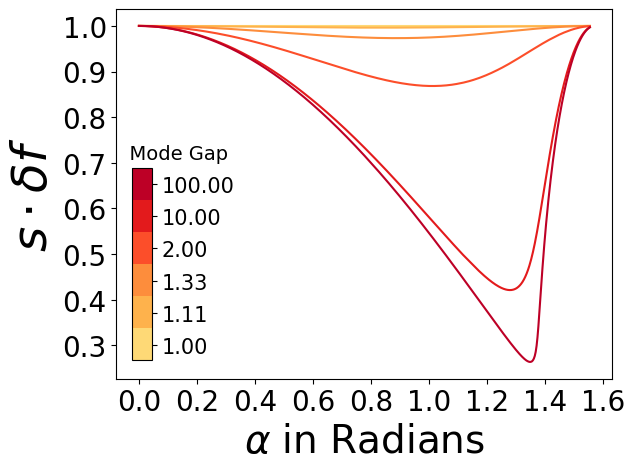

In [63]:
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter
mode_gaps = np.array([1,0.9, 0.75,0.5,0.1,0.02])

colors = [pal.YlOrRd_9.mpl_colors[i+2] for i in range(len(mode_gaps))]
cmap = ListedColormap(colors)

plt.rcParams['text.usetex'] = False
mode_gaps = np.array([1,0.9, 0.75,0.5,0.1,0.01])
for j in range(len(mode_gaps)):
  plt.plot(alphas,np.abs(sdot_alphas[j]),color = colors[j], label = 'mode gap = ' + str(np.round(1/mode_gaps[j],2) ))
plt.xlabel(r'$\alpha$ in Radians', fontsize=28)
plt.ylabel('$s\cdot \delta f$', fontsize=35 )
xticks = plt.gca().get_xticklabels()
yticks = plt.gca().get_yticklabels()

# Increase the tick size for both x and y axes
for tick in xticks + yticks:
    tick.set_fontsize(20)  # Adjust the font size as desired
norm = plt.Normalize(min(mode_gaps), max(mode_gaps))
cbar_ax = plt.gcf().add_axes([0.15, 0.15, 0.03, 0.4])



cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm),cax=cbar_ax)
cbar.set_ticks([1/6*(i) + 1/12 for i in range(len(mode_gaps))])
cbar.set_ticklabels([f'{param:.2f}' for param in 1/mode_gaps])


cbar.ax.set_title('            Mode Gap', fontsize = 14)
xticks = plt.gca().get_xticklabels()
yticks = plt.gca().get_yticklabels()

# Increase the tick size for both x and y axes
for tick in xticks + yticks:
    tick.set_fontsize(15)  # Adjust the font size as desired
plt.savefig("fig1a.svg")
plt.show()

In [ ]:
alphas = np.linspace(0,np.pi,1000)
#sdot = [np.dot(np.array([np.cos(phis[i]),np.sin(phis[i])]),np.array([np.cos(alphas[i]),np.sin(alphas[i])])) for i in range(len(alphas))]
#gdot = [np.dot(np.array([np.cos(thetas[i]),np.sin(thetas[i])]),np.array([np.cos(alphas[i]),np.sin(alphas[i])])) for i in range(len(alphas))]
sdot = [np.dot(np.array([np.cos(phis[i]),np.sin(phis[i])]),np.array([0,1])) for i in range(len(alphas))]
gdot = [np.dot(np.array([np.cos(thetas[i]),np.sin(thetas[i])]),np.array([0,1])) for i in range(len(alphas))]



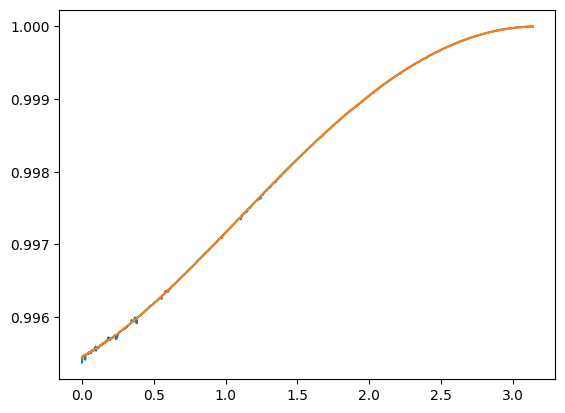

In [ ]:
plt.plot(alphas,np.abs(sdot))
plt.plot(alphas,np.abs(gdot))

In [ ]:
for k in tqdm(range(len(theta))):
  dx = np.zeros((len(alpha),len(phi)))
  for i in range(len(alpha)):
    for j in range(len(phi)):
      dF = np.array([np.cos(theta[k]),np.sin(theta[k])])
      g = np.array([np.cos(phi[j]),np.sin(phi[j])])
      s = np.array([np.cos(alpha[i]),np.sin(alpha[i])])
      dx[i,j] = np.linalg.norm(np.matmul(np.linalg.inv(Jx - np.outer(g, s)), dF))
  alpha_min = alpha[np.argwhere(dx == np.min(dx))[0][0]]
  phi_min = phi[np.argwhere(dx == np.min(dx))[0][1]]
  g_min  = np.array([np.cos(phi_min),np.sin(phi_min)])
  s_min = np.array([np.cos(alpha_min),np.sin(alpha_min)])
  gdot[k] = np.dot(g_min,dF)
  sdot[k] = np.dot(s_min,dF)
  opt_alpha[k] = alpha[np.argwhere(dx == np.min(dx))[0][0]]
  opt_phi[k] = phi[np.argwhere(dx == np.min(dx))[0][1]]


100%|██████████| 100/100 [01:15<00:00,  1.33it/s]


In [ ]:
j = 1
i = 1
k = 1
dF = np.array([np.cos(theta[k]),np.sin(theta[k])])
g = np.array([np.cos(phi[j]),np.sin(phi[j])])
s = np.array([np.cos(alpha[i]),np.sin(alpha[i])])

In [ ]:
np.linalg.norm(np.matmul(np.linalg.inv(Jx - np.outer(g, s)), dF))

0.33333113569402684

In [ ]:
np.argwhere(Jx == np.min(Jx))[0][1]

1

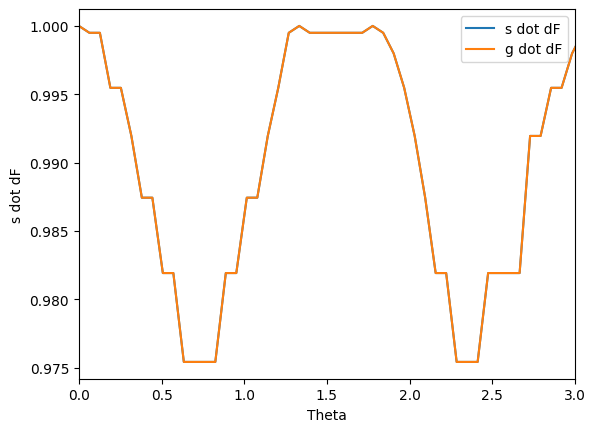

In [ ]:

plt.plot(theta,np.abs(sdot),label = 's dot dF')
plt.plot(theta,np.abs(sdot),label = 'g dot dF')
#plt.plot(theta,[np.dot(np.array([np.cos(t),np.sin(t)]),[1,0]) for t in theta ])
plt.ylabel('s dot dF')
plt.xlim([0,3])
plt.xlabel('Theta')
plt.legend()

In [ ]:
opt_phi

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 3.14159265,
       0.19039955, 0.53946541, 0.856798  , 1.11066407, 1.36453014,
       1.65012947, 1.90399555, 2.15786162, 2.44346095, 2.76079354,
       3.10985939, 3.14159265, 3.14159265, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 3.14159265, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03173326,
       0.38079911, 0.6981317 , 0.98373103, 1.23759711, 1.49146